In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np 

<font color ='blue'> Data Readering And Preprocessing 

In [3]:
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    vertices = {}
    edges = []
    is_vertex = True

    for line in lines:
        line = line.strip()
        if line == '*Vertices':
            continue
        elif line == '*Edges':
            is_vertex = False
            continue

        if is_vertex:
            try:
                vertex_id, vertex_name = line.split(' ', 1)  # splitting only on the first space
                vertices[int(vertex_id)] = vertex_name.strip('"')
            except ValueError:
                # This line is not a vertex data line, skip it
                continue
        else:
            vertex1, vertex2 = map(int, line.split(' '))
            edges.append((vertex1, vertex2))

    return vertices, edges

In [7]:
vertices, edges = read_data('/content/drive/MyDrive/Colab Notebooks/data.txt') # Reading data from 'data.txt' file

print("Vertices:", vertices)
print("Edges:", edges)

print("\nNumber of nodes (vertices):", len(vertices))
print("Number of edges:", len(edges))

Vertices: {1: 'brodersohn', 2: 'james-baker', 3: 'volcker', 4: 'camdessus', 5: 'sumita', 6: 'nakasone', 7: 'reagan', 8: 'howard-baker', 9: 'leigh-pemberton', 10: 'conable', 11: 'lawson', 12: 'lyng', 13: 'yeutter', 14: 'sprinkel', 15: 'balladur', 16: 'de-larosiere', 17: 'duisenberg', 18: 'ruding', 19: 'haughey', 20: 'delors', 21: 'alfonsin', 22: 'von-weizsaecker', 23: 'de-clercq', 24: 'kohl', 25: 'garcia', 26: 'petricioli', 27: 'suharto', 28: 'tamura', 29: 'du-plessis', 30: 'de-kock', 31: 'chirac', 32: 'macsharry', 33: 'miyazawa', 34: 'ongpin', 35: 'fernandez', 36: 'ozal', 37: 'papandreou', 38: 'thatcher', 39: 'ryzhkov', 40: 'james-miller', 41: 'aquino', 42: 'eyskens', 43: 'stoltenberg', 44: 'goria', 45: 'poehl', 46: 'wilson', 47: 'douglas', 48: 'lange', 49: 'sarney', 50: 'sourrouille', 51: 'zhao-ziyang', 52: 'cavaco-silva', 53: 'del-mazo', 54: 'mancera-aguayo', 55: 'fujioka', 56: 'ciampi', 57: 'greenspan', 58: 'kaufman', 59: 'keating', 60: 'hawke', 61: 'jaruzelski', 62: 'verity', 63: '

<font color ='blue'> Graph of Vertices And Nodes

In [9]:
def create_graph(vertices, edges):
    graph = {vertex: [] for vertex in vertices}

    for edge in edges:
        vertex1, vertex2 = edge
        graph[vertex1].append(vertex2)
        graph[vertex2].append(vertex1)

    return graph

graph = create_graph(vertices, edges) # Creating graph

# Printing graph
for vertex, connected_vertices in graph.items():
    print(f"Vertex {vertex} ({vertices[vertex]}): {connected_vertices}")

Vertex 1 (brodersohn): [2, 3, 4, 50, 21]
Vertex 2 (james-baker): [1, 3, 4, 11, 7, 14, 8, 26, 31, 40, 33, 43, 45, 15, 16, 5, 9, 44, 46, 50, 6, 57, 63, 78, 79, 59, 80, 81, 95, 83, 90, 96, 106, 6, 110, 113, 12, 114, 3, 119, 120, 121, 122, 101, 176, 202, 203, 204, 205, 161, 206, 18, 10, 246, 247, 248, 273, 200, 274, 275, 276, 4, 152, 267, 13, 28, 321, 227, 165, 397, 400, 454, 420, 413, 397, 412, 403, 401, 394, 107, 393, 78]
Vertex 3 (volcker): [1, 2, 4, 11, 7, 14, 8, 43, 46, 33, 57, 18, 58, 114, 2, 15, 176, 202, 203, 204, 205, 161, 121, 206, 212, 213, 214, 215, 216, 101, 226, 242, 243, 40, 152, 412, 403, 401]
Vertex 4 (camdessus): [1, 2, 3, 9, 10, 57, 21, 7, 2, 21, 50]
Vertex 5 (sumita): [6, 43, 45, 15, 16, 33, 9, 44, 2, 7, 176, 6, 33, 17, 80, 279, 240]
Vertex 6 (nakasone): [5, 28, 7, 33, 38, 8, 2, 61, 63, 71, 72, 67, 73, 74, 75, 76, 83, 93, 43, 24, 2, 110, 113, 12, 140, 13, 227, 55, 95, 101, 255, 151, 163, 257, 261, 262, 269, 99, 270, 271, 272, 273, 200, 176, 274, 275, 276, 277, 204, 278,

<font color ='blue'> Graph Visualization

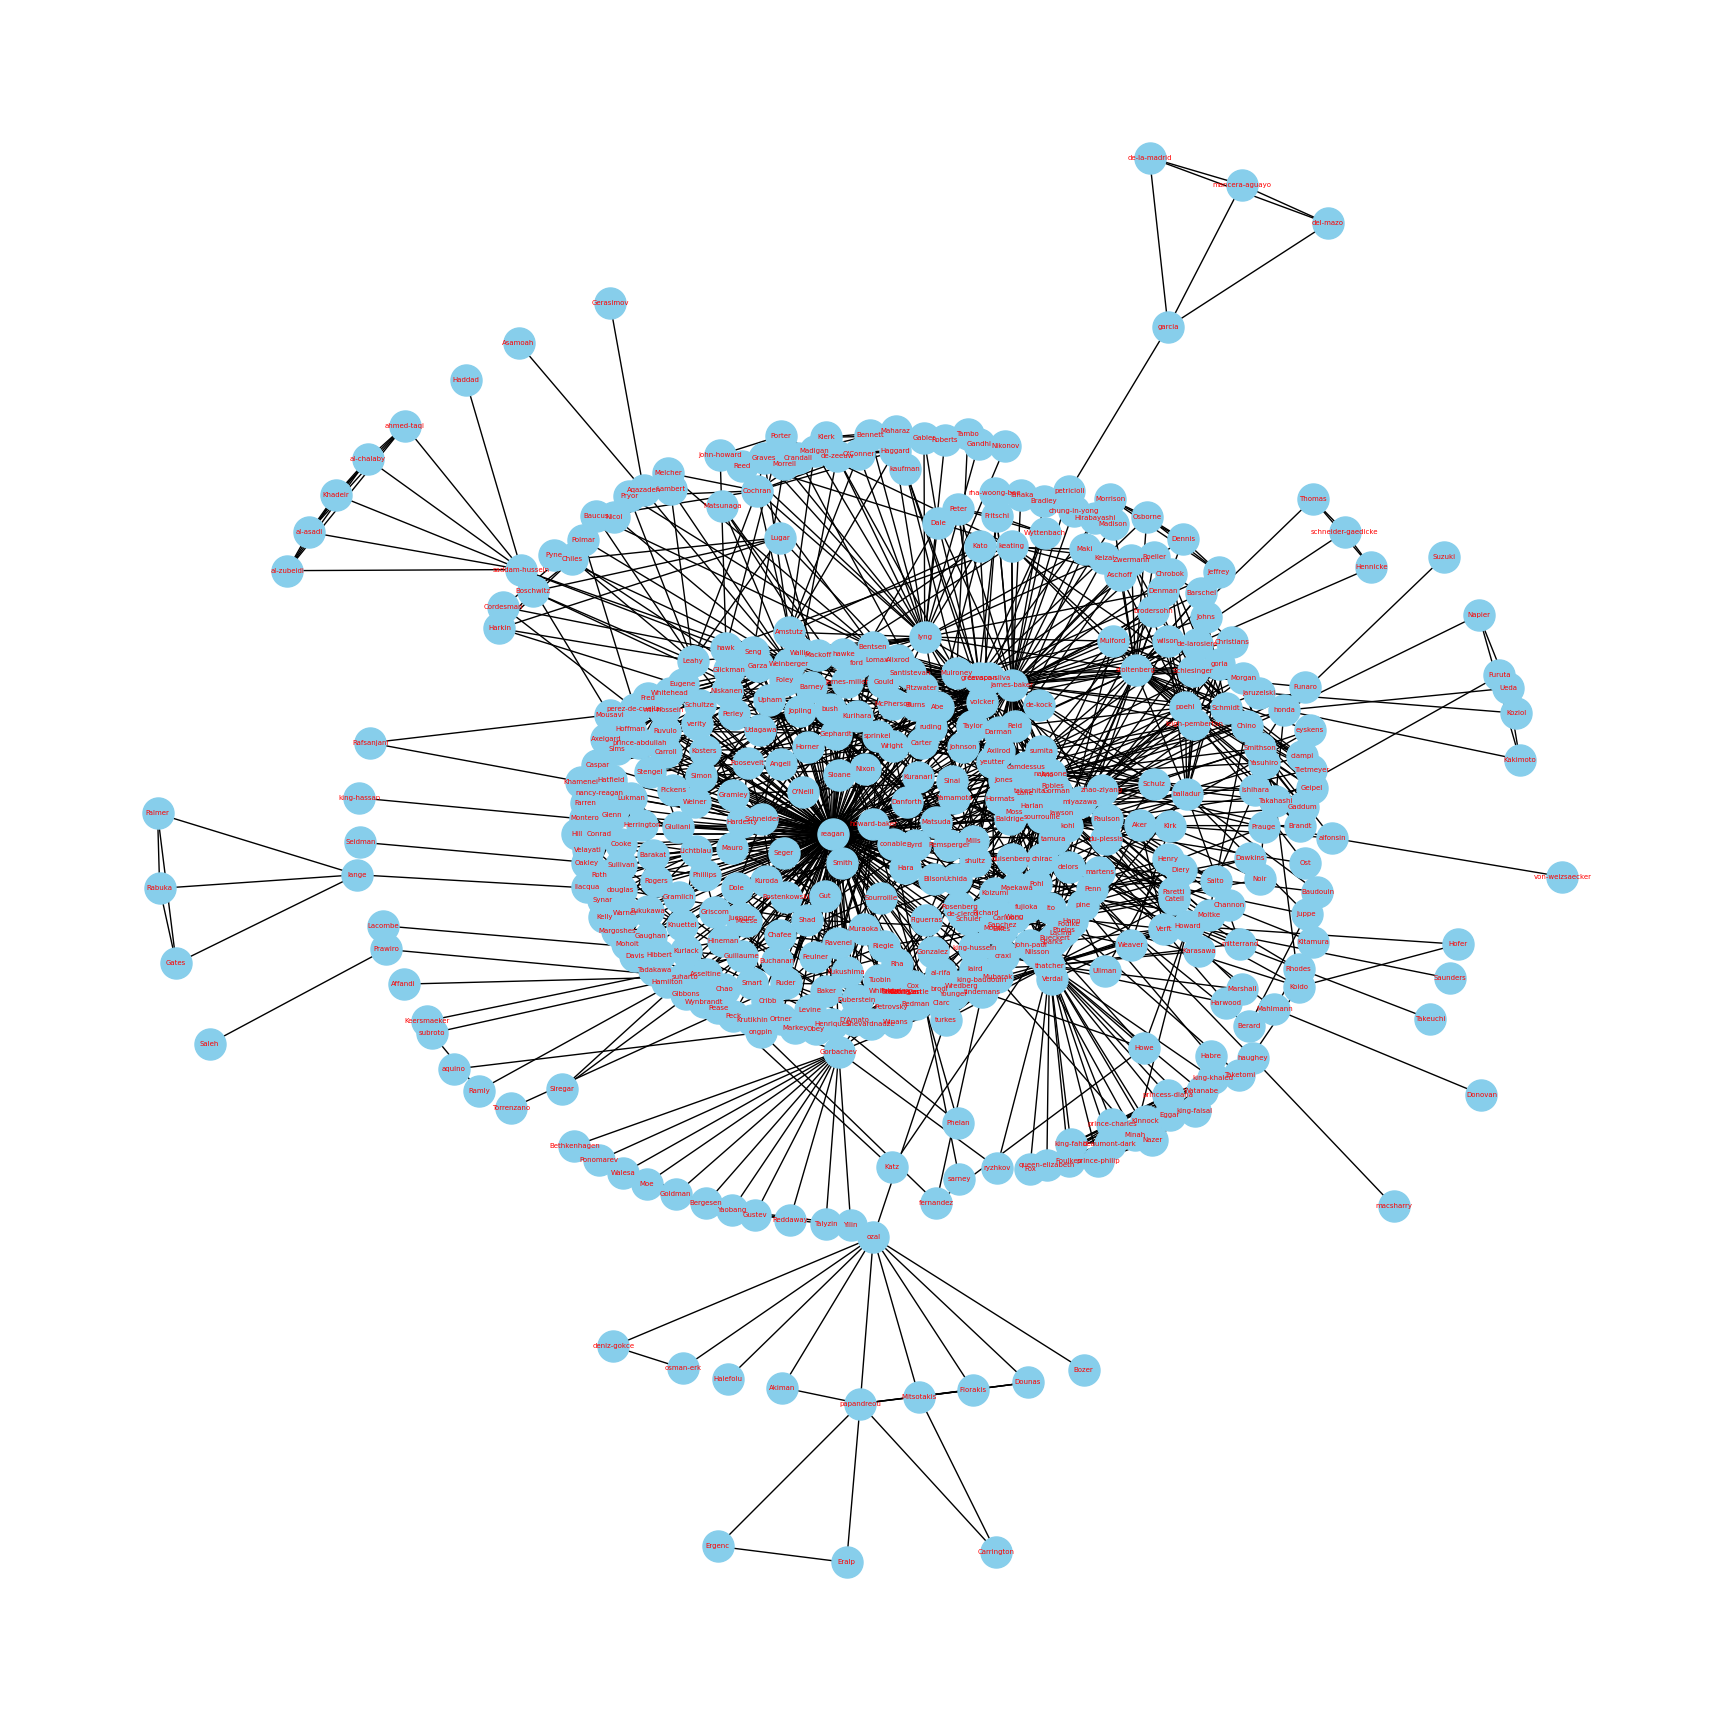

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

def create_and_draw_graph(vertices, edges):
    G = nx.Graph()

    # Adding nodes to the graph
    for vertex in vertices:
        G.add_node(vertex, label=vertices[vertex])

    # Adding edges to the graph
    for edge in edges:
        G.add_edge(*edge)

    # Drawing the graph
    plt.figure(figsize=(17, 17)) 
    pos = nx.kamada_kawai_layout(G)  # using kamada_kawai_layout
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=500, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(G, pos, labels, font_size=5, font_color='red')  
    plt.show()

create_and_draw_graph(vertices, edges)

<font color ='blue'> Directed Graph And Adjacency Matrix

In [14]:
def create_directed_graph(vertices, edges):
    graph = {vertex: [] for vertex in vertices}

    for edge in edges:
        vertex1, vertex2 = edge
        graph[vertex1].append(vertex2)  # Edge from vertex1 to vertex2

    return graph

In [15]:
def create_adjacency_matrix(vertices, edges):
    # Initializing the adjacency matrix with zeros
    adjacency_matrix = np.zeros((len(vertices), len(vertices)))

    for edge in edges:
        vertex1, vertex2 = edge
        # As the vertices are 1-indexed, we subtract 1 when accessing the matrix
        adjacency_matrix[vertex1-1][vertex2-1] = 1
        adjacency_matrix[vertex2-1][vertex1-1] = 1  # For undirected graph

    return adjacency_matrix

In [16]:
directed_graph = create_directed_graph(vertices, edges)
adjacency_matrix = create_adjacency_matrix(vertices, edges)

print("Directed Graph:", directed_graph)
print("Adjacency Matrix:\n", adjacency_matrix)

Directed Graph: {1: [2, 3, 4, 50], 2: [3, 4, 26, 40, 33, 43, 46, 6, 63, 78, 79, 59, 80, 81, 90, 96, 110, 113, 12, 119, 121, 176, 248, 276, 152, 420, 413, 397, 78], 3: [4, 14, 8, 43, 46, 57, 2, 15, 176, 203, 204, 213, 214, 215, 216, 101, 243], 4: [57, 7, 2, 21, 50], 5: [6, 9, 44, 2, 7, 176, 6, 33, 17, 80, 279, 240], 6: [28, 33, 38, 61, 63, 72, 67, 73, 74, 75, 76, 83, 93, 2, 110, 113, 12, 101, 255, 151, 163, 99, 270, 271, 272, 176, 276, 204, 278, 17, 80, 279, 240, 270, 331, 294, 358, 295, 63], 7: [8, 3, 14, 2, 13, 6, 31, 40, 57, 38, 62, 63, 91, 96, 97, 119, 121, 12, 160, 161, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 196, 47, 198, 199, 200, 201, 208, 209, 211, 213, 214, 215, 216, 96, 38, 228, 229, 232, 233, 234, 237, 239, 166, 50, 243, 255, 151, 256, 259, 260, 264, 265, 267, 268, 270, 271, 272, 200, 275, 276, 278, 17, 80, 279, 240, 27, 28, 31, 362, 363, 364, 171, 365, 367, 368, 369, 458, 451, 444, 439, 312, 409, 141, 62, 392, 390, 180, 391, 24, 

<font color ='blue'> Itrative PageRank Algorithm Implementation 

In [21]:
def page_rank(graph, damping_factor=0.85, max_iterations=100, min_delta=0.00001):
    nodes = graph.keys()
    graph_size = len(nodes)
    if graph_size == 0:
        return {}

    min_value = (1.0-damping_factor) / graph_size  # value for nodes without out links

    # initialize the page rank dict with 1/N for all nodes
    pagerank = dict.fromkeys(nodes, 1.0/graph_size)

    for i in range(max_iterations):
        diff = 0  # total difference compared to last iteration
        # for each node do the pagerank computation
        for node in nodes:
            rank = min_value
            for referring_page in graph[node]:
                rank += damping_factor * pagerank[referring_page] / len(graph[referring_page])

            diff += abs(pagerank[node] - rank)
            pagerank[node] = rank

        # stop if PageRank has converged
        if diff < min_delta:
            break

    return pagerank

In [22]:
# Applying PageRank on the graph
pagerank = page_rank(graph)

# Printing the PageRank scores
for node, score in pagerank.items():
    print(f"Node {node} ({vertices[node]}): {score}")

Node 1 (brodersohn): 0.0016763987361760047
Node 2 (james-baker): 0.02152838254339281
Node 3 (volcker): 0.009640655541153413
Node 4 (camdessus): 0.0032830083592698474
Node 5 (sumita): 0.004076737163946994
Node 6 (nakasone): 0.016321790735326854
Node 7 (reagan): 0.06556774409502332
Node 8 (howard-baker): 0.009296323591989826
Node 9 (leigh-pemberton): 0.0026106884514269565
Node 10 (conable): 0.003060039750047753
Node 11 (lawson): 0.004468187518900378
Node 12 (lyng): 0.011001261817001048
Node 13 (yeutter): 0.008759694982874483
Node 14 (sprinkel): 0.0031724549843509804
Node 15 (balladur): 0.005009949696062059
Node 16 (de-larosiere): 0.002037307280061537
Node 17 (duisenberg): 0.002144659430547624
Node 18 (ruding): 0.0014580793165098907
Node 19 (haughey): 0.0014057706918264908
Node 20 (delors): 0.002415858093052466
Node 21 (alfonsin): 0.002002958742094242
Node 22 (von-weizsaecker): 0.0006673003717769362
Node 23 (de-clercq): 0.0016647117927097751
Node 24 (kohl): 0.007002209233901579
Node 25 (g

<font color ='blue'>The above are the nodes, people, and corresponding scores.  

In [23]:
def print_top_20_nodes(pagerank, vertices):

    sorted_nodes = sorted(pagerank.items(), key=lambda item: item[1], reverse=True) # Sorting the nodes by their PageRank scores in descending order
    top_20_nodes = sorted_nodes[:20] # Selecting the top 20 nodes

    # Printing names and PageRank scores of the top 20 nodes
    for node, score in top_20_nodes:
        print(f"Node {node} ({vertices[node]}): {score}")

<font color ='blue'> Final Result

In [24]:
print_top_20_nodes(pagerank, vertices)

Node 7 (reagan): 0.06556774409502332
Node 2 (james-baker): 0.02152838254339281
Node 6 (nakasone): 0.016321790735326854
Node 38 (thatcher): 0.01405100683504674
Node 43 (stoltenberg): 0.011032520911152957
Node 12 (lyng): 0.011001261817001048
Node 83 (Weinberger): 0.00969327172531046
Node 3 (volcker): 0.009640655541153413
Node 8 (howard-baker): 0.009296323591989826
Node 13 (yeutter): 0.008759694982874483
Node 256 (Gorbachev): 0.008154409808426516
Node 57 (greenspan): 0.008039708487115724
Node 33 (miyazawa): 0.007676814974598526
Node 151 (Gephardt): 0.007116743507893871
Node 24 (kohl): 0.007002209233901579
Node 45 (poehl): 0.00673408373018457
Node 96 (shultz): 0.006181267819023077
Node 294 (Howard): 0.005893464789654408
Node 36 (ozal): 0.005544136360031637
Node 31 (chirac): 0.0051600557344136325
